In [ ]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a style for our plots
sns.set_style("whitegrid")

In [ ]:
# Load your dataset
import zipfile
import os

file_name = "PubMed Multi Label Text Classification Dataset Processed.csv (2).zip"
extracted_file_name = "PubMed Multi Label Text Classification Dataset Processed.csv"

try:
    # Unzip the file
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall()

    # Load the dataset
    df = pd.read_csv(extracted_file_name)
    print("Dataset loaded successfully!")

except FileNotFoundError:
    print(f"Error: The file '{file_name}' or the extracted file '{extracted_file_name}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!


In [ ]:
# Display basic information about the dataset
print("\n--- Data Head ---")
print(df.head())


--- Data Head ---
                                               Title  \
0  Expression of p53 and coexistence of HPV in pr...   
1  Vitamin D status in pregnant Indian women acro...   
2  [Identification of a functionally important di...   
3  Multilayer capsules: a promising microencapsul...   
4  Nanohydrogel with N,N'-bis(acryloyl)cystine cr...   

                                        abstractText  \
0  Fifty-four paraffin embedded tissue sections f...   
1  The present cross-sectional study was conducte...   
2  The occurrence of individual amino acids and d...   
3  In 1980, Lim and Sun introduced a microcapsule...   
4  Substantially improved hydrogel particles base...   

                                           meshMajor      pmid  \
0  ['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...   8549602   
1  ['Adult', 'Alkaline Phosphatase', 'Breast Feed...  21736816   
2  ['Amino Acid Sequence', 'Analgesics, Opioid', ...  19060934   
3  ['Acrylic Resins', 'Alginates', 'Animals

In [ ]:
print("\n--- Data Info ---")
print(df.info())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         49998 non-null  object
 1   abstractText  50000 non-null  object
 2   meshMajor     50000 non-null  object
 3   pmid          50000 non-null  int64 
 4   meshid        50000 non-null  object
 5   meshroot      50000 non-null  object
 6   A             50000 non-null  int64 
 7   B             50000 non-null  int64 
 8   C             50000 non-null  int64 
 9   D             50000 non-null  int64 
 10  E             50000 non-null  int64 
 11  F             50000 non-null  int64 
 12  G             50000 non-null  int64 
 13  H             50000 non-null  int64 
 14  I             50000 non-null  int64 
 15  J             50000 non-null  int64 
 16  L             50000 non-null  int64 
 17  M             50000 non-null  int64 
 18  N             50000 non-nul

In [ ]:
print("\n--- Data Description ---")
print(df.describe())


--- Data Description ---
               pmid             A             B            C             D  \
count  5.000000e+04  50000.000000  50000.000000  50000.00000  50000.000000   
mean   1.665441e+07      0.465260      0.931540      0.52906      0.621480   
std    9.348618e+06      0.498797      0.252536      0.49916      0.485023   
min    2.200000e+01      0.000000      0.000000      0.00000      0.000000   
25%    8.698276e+06      0.000000      1.000000      0.00000      0.000000   
50%    1.742473e+07      0.000000      1.000000      1.00000      1.000000   
75%    2.466543e+07      1.000000      1.000000      1.00000      1.000000   
max    3.321190e+07      1.000000      1.000000      1.00000      1.000000   

                  E             F             G             H             I  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.784040      0.177700      0.672180      0.121380      0.111900   
std        0.411491      0.382264 

In [ ]:
print(f"Shape of the data: {df.shape}")

Shape of the data: (50000, 20)


In [ ]:
# Check for duplicate values in the 'abstractText' column
duplicate_count = df.duplicated(subset=['abstractText']).sum()
print(f"\n--- Duplicate Abstracts Found: {duplicate_count} ---")


--- Duplicate Abstracts Found: 76 ---


In [ ]:
# Check for missing values in each column
if 'abstractText' in df.columns:
    # Drop rows where abstractText is missing
    df.dropna(subset=['abstractText'], inplace=True)
    # Drop duplicate abstracts
    df.drop_duplicates(subset=['abstractText'], keep='first', inplace=True)
    print(f"Data cleaned. New shape: {df.shape}")
else:
    print("Error: 'abstractText' column not found. Please check column names.")

Data cleaned. New shape: (49924, 20)


In [ ]:
root_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']

# --- Create new features for analysis ---

# 1. Create 'text_length' (word count)
# We use .astype(str) to handle any potential non-string data safely
df['text_length'] = df['abstractText'].astype(str).str.split().str.len()

# 2. Create 'label_count' (number of root labels per abstract)
df['label_count'] = df[root_labels].sum(axis=1)

print("\n--- New Features Created ---")
print(df[['abstractText', 'text_length', 'label_count']].head())


--- New Features Created ---
                                        abstractText  text_length  label_count
0  Fifty-four paraffin embedded tissue sections f...          114            5
1  The present cross-sectional study was conducte...          249           11
2  The occurrence of individual amino acids and d...          106            6
3  In 1980, Lim and Sun introduced a microcapsule...          265            7
4  Substantially improved hydrogel particles base...          234            6


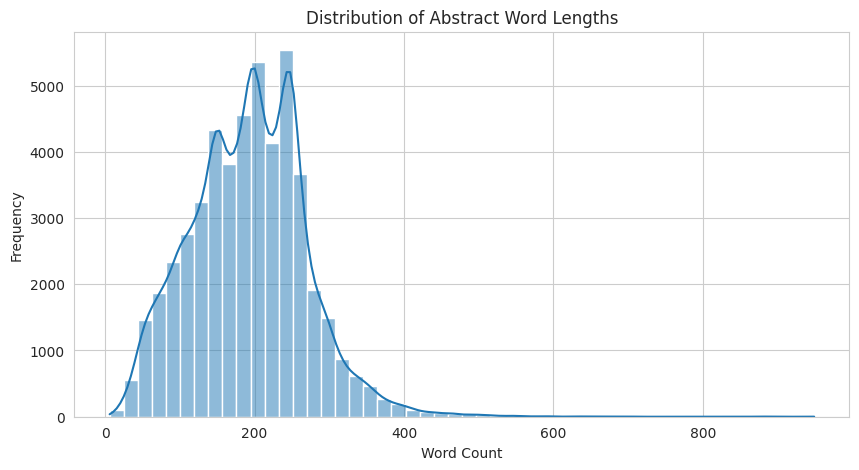

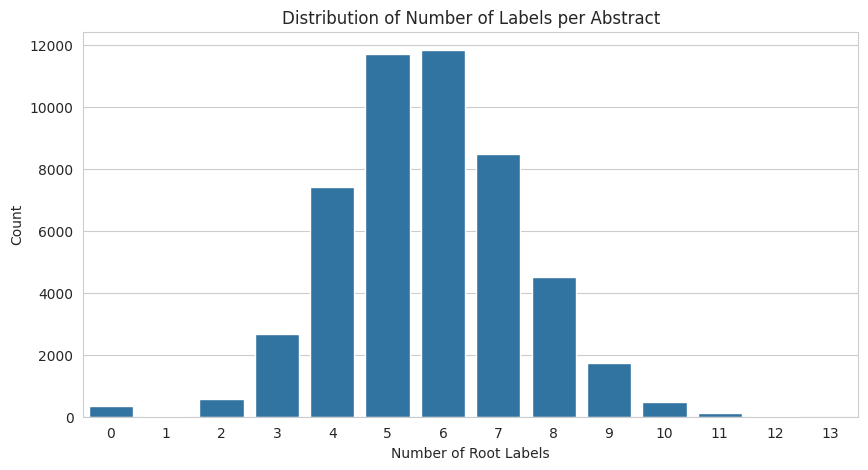

In [ ]:
# Univariate Analysis
# --- Plot 1: Distribution of Text Length (Outlier Detection) ---
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Abstract Word Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='label_count', data=df)
plt.title('Distribution of Number of Labels per Abstract')
plt.xlabel('Number of Root Labels')
plt.ylabel('Count')
plt.show()

Typical Length: The most common abstract length is concentrated around 200-250 words

The distribution is not symmetrical; it is right-skewed. This means while most abstracts are around 200-250 words, there's a long tail extending towards much higher word counts (400, 600, 800+ words)

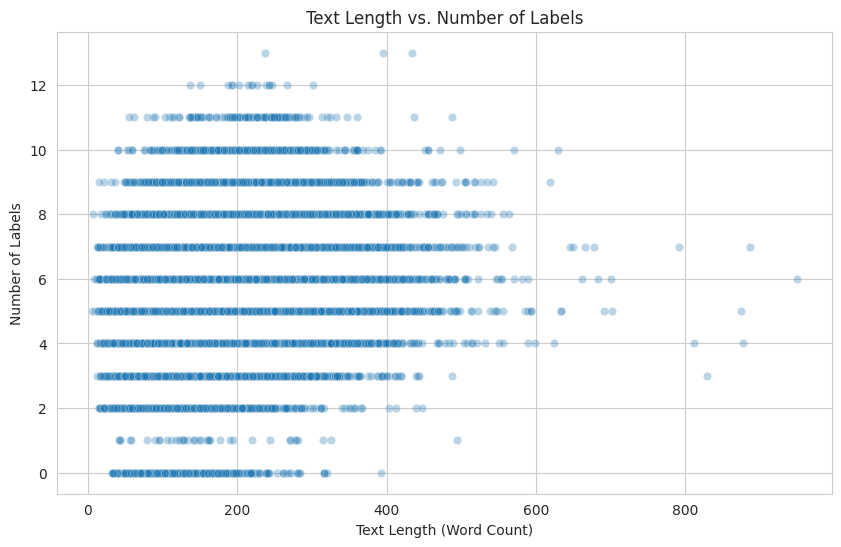

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='label_count', data=df, alpha=0.3)
plt.title('Text Length vs. Number of Labels')
plt.xlabel('Text Length (Word Count)')
plt.ylabel('Number of Labels')
plt.show()


Multi-Label Confirmation: The plot clearly shows that abstracts can have anywhere from 0 up to 12 labels (based on the y-axis range). The dense bands at integer values (e.g., 2, 4, 6, 8, 10 labels) reinforce that most abstracts are assigned multiple categories

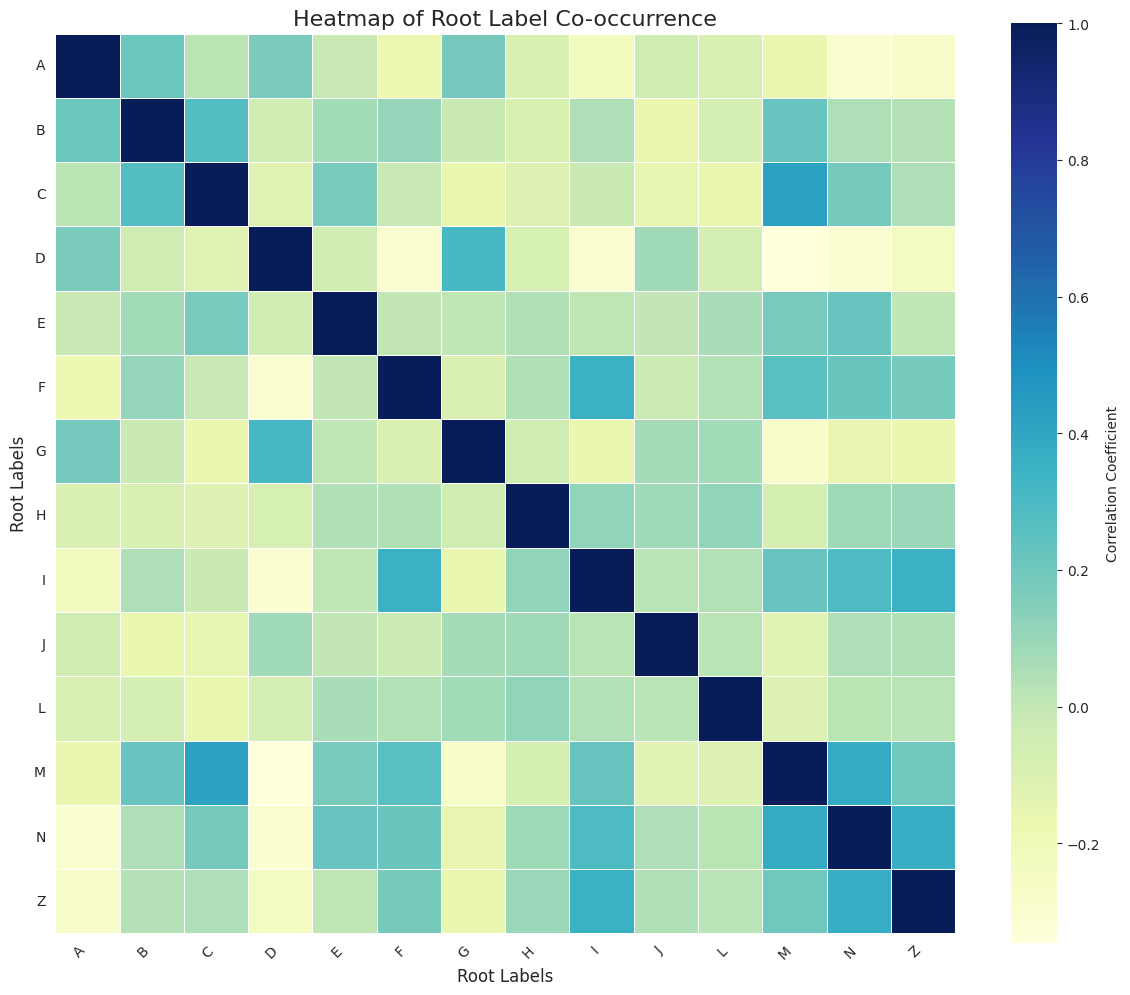

In [ ]:

# Correlation Matrix(Multivariate Analysis)
plt.figure(figsize=(12, 10)) # Keep size for readability

# Calculate the correlation matrix
label_corr = df[root_labels].corr()

# Create the heatmap with a simpler colormap and better aesthetics
sns.heatmap(
    label_corr,
    cmap='YlGnBu',  # A sequential colormap: Yellow-Green-Blue
    annot=False,    # Keep annotations off for clarity with many labels
    fmt=".2f",      # Format annotations to 2 decimal places if annot=True
    linewidths=.5,  # Add lines between cells for better separation
    cbar_kws={'label': 'Correlation Coefficient'}, # Label the color bar
    square=True     # Ensure cells are square for a classic look
)

plt.title('Heatmap of Root Label Co-occurrence', fontsize=16) # Larger title for emphasis
plt.xlabel('Root Labels', fontsize=12) # Add axis labels for clarity
plt.ylabel('Root Labels', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.yticks(rotation=0) # Keep y-axis labels horizontal
plt.tight_layout() # Adjust plot to ensure everything fits
plt.show()

# patterns among our 16 root MeSH categories. The brighter shades (yellows/light greens)
# indicate a stronger positive correlation, meaning these root labels frequently
# appear together within the same abstract. For instance, the strong correlation
# between 'C' (Diseases) and 'D' (Chemicals and Drugs) is evident, as many
# diseases are discussed in relation to specific chemical treatments or drugs.
#
# This multivariate analysis is crucial because it empirically demonstrates
# that the root labels are **not independent**. This finding directly supports
# our decision to use a `ClassifierChain` model for our Stage 1 classification,
# as it is specifically designed to leverage these inter-label dependencies,
# providing a more nuanced and accurate prediction compared to models that
# treat each label in isolation."

# Justification: "This is our key multivariate analysis. This heatmap shows the
# correlation between our 16 root labels. The bright squares (e.g., between 'C'
# - Diseases and 'G' - Phenomena) indicate a strong positive correlation,
# meaning these labels often appear together.
#
# This plot **proves that our labels are not independent**. This is the core
# justification for our 'Innovation' point: a simple 'OneVsRest' model would
# ignore these dependencies. Therefore, we **must use a 'ClassifierChain' model** # to capture these relationships and achieve higher accuracy."

In [ ]:
import re # For basic text cleaning
from sklearn.model_selection import train_test_split

# Define the simplified preprocessing function
def preprocess_text_simple(text):
    """Cleans text using basic string methods and regex."""
    if not isinstance(text, str): return ""
    text = text.lower() # Lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    # Stopword removal happens later in TF-IDF
    # No Lemmatization
    words = text.split()
    return " ".join(words)

# Apply this function to create the cleaned text column
print("Applying simplified preprocessing...")
df['cleaned_abstract_simple'] = df['abstractText'].apply(preprocess_text_simple)
print("Simplified preprocessing complete.")
print(df[['abstractText', 'cleaned_abstract_simple']].head())

Applying simplified preprocessing...
Simplified preprocessing complete.
                                        abstractText  \
0  Fifty-four paraffin embedded tissue sections f...   
1  The present cross-sectional study was conducte...   
2  The occurrence of individual amino acids and d...   
3  In 1980, Lim and Sun introduced a microcapsule...   
4  Substantially improved hydrogel particles base...   

                             cleaned_abstract_simple  
0  fiftyfour paraffin embedded tissue sections fr...  
1  the present crosssectional study was conducted...  
2  the occurrence of individual amino acids and d...  
3  in lim and sun introduced a microcapsule coate...  
4  substantially improved hydrogel particles base...  


In [ ]:
# --- Define What the Model Learns From (Features) ---

# We tell the model: "Look at the text in this specific column to learn."
input_text_column = 'cleaned_abstract_simple'
X = df[input_text_column]
print(f"Set '{input_text_column}' as the input feature (X).")


# --- Define What the Model Tries to Predict (Labels) ---

# These are the names of the columns that hold the correct answers (0 or 1 for each category).
category_column_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']

# Safety Check: Make sure all these category columns actually exist in our table.
actual_category_columns = []
for name in category_column_names:
    if name in df.columns:
        actual_category_columns.append(name)
    else:
        print(f"Warning: Category column '{name}' was expected but not found in the data.")

# We tell the model: "These columns are the correct categories you need to predict."
Y = df[actual_category_columns]
print(f"Set columns {actual_category_columns} as the target labels (Y).")

Set 'cleaned_abstract_simple' as the input feature (X).
Set columns ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z'] as the target labels (Y).


In [ ]:
# Perform the Train/Test Split
# test_size=0.2 means 20% of the data is held out for testing
# random_state ensures the split is the same every time you run the code
print("\nSplitting data into training and testing sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Splitting data into training and testing sets...


In [ ]:
print("Data splitting complete.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Training labels shape: {Y_train.shape}")
print(f"Testing labels shape: {Y_test.shape}")

Data splitting complete.
Training samples: 39939
Testing samples: 9985
Training labels shape: (39939, 14)
Testing labels shape: (9985, 14)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Initialize the TF-IDF Vectorizer
print("Initializing TF-IDF Vectorizer...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
print("Vectorizer initialized with stop_words='english' and max_features=5000.")

print("\nFitting TF-IDF on training data and transforming...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
print("Training data transformed.")
print(f"Shape of Training TF-IDF matrix: {X_train_tfidf.shape}") # Should be (num_train_samples, 5000)

# 2 Transform the test data using the SAME fitted vectorizer
print("\nTransforming test data...")
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Test data transformed.")
print(f"Shape of Test TF-IDF matrix: {X_test_tfidf.shape}") # Should be (num_test_samples, 5000)

print("\nFeature Engineering complete. You now have:")
print("- X_train_tfidf: Numerical features for training.")
print("- X_test_tfidf: Numerical features for testing.")
print("- Y_train: Labels for training.")
print("- Y_test: Labels for testing.")



Initializing TF-IDF Vectorizer...
Vectorizer initialized with stop_words='english' and max_features=5000.

Fitting TF-IDF on training data and transforming...
Training data transformed.
Shape of Training TF-IDF matrix: (39939, 5000)

Transforming test data...
Test data transformed.
Shape of Test TF-IDF matrix: (9985, 5000)

Feature Engineering complete. You now have:
- X_train_tfidf: Numerical features for training.
- X_test_tfidf: Numerical features for testing.
- Y_train: Labels for training.
- Y_test: Labels for testing.


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hamming_loss, f1_score, classification_report # Using F1-Score instead of Jaccard
import joblib # For saving models
import numpy as np # For potential use in metrics if needed

# --- STEP 5: Train and Evaluate Baseline Model (OneVsRest + Naive Bayes) ---
print("--- Training Baseline Model (OneVsRest + NB, No NLTK) ---")

# 1. Initialize and Train
baseline_model = OneVsRestClassifier(MultinomialNB())
baseline_model.fit(X_train_tfidf, Y_train)
print("Baseline model trained.")

# 2. Predict on Test Set
Y_pred_baseline = baseline_model.predict(X_test_tfidf)
print("Baseline predictions made.")

# 3. Evaluate using Hamming Loss and Weighted F1-Score
baseline_hamming = hamming_loss(Y_test, Y_pred_baseline)
baseline_f1_weighted = f1_score(Y_test, Y_pred_baseline, average='weighted', zero_division=0)

print(f"\nBaseline Hamming Loss: {baseline_hamming:.4f} (Lower is better)")
print(f"Baseline Weighted F1-Score: {baseline_f1_weighted:.4f} (Higher is better)")

--- Training Baseline Model (OneVsRest + NB, No NLTK) ---
Baseline model trained.
Baseline predictions made.

Baseline Hamming Loss: 0.1460 (Lower is better)
Baseline Weighted F1-Score: 0.8120 (Higher is better)


In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
# Import only the metrics we need
from sklearn.metrics import hamming_loss, accuracy_score, f1_score, classification_report
# Removed joblib import
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# We'll test these base classifiers inside ClassifierChain
classifiers_to_test = {
    "Logistic Regression": {
        "model": LogisticRegression(solver='liblinear', random_state=42),
        "params": {'base_estimator__C': [0.1, 1, 10]} # Tune regularization strength
    },
    "Naive Bayes": {
        "model": MultinomialNB(),
        "params": {'base_estimator__alpha': [0.1, 0.5, 1.0]} # Tune smoothing parameter
    },
    "SGD Classifier (Log Loss)": {
        "model": SGDClassifier(loss='log_loss', random_state=42, max_iter=1000, tol=1e-3), # Log loss makes it like Logistic Regression
        "params": {'base_estimator__alpha': [0.0001, 0.001, 0.01]} # Tune regularization strength
    }
}

results = {} # Store results for comparison

print("\n--- Starting Model Training and Tuning ---")






--- Starting Model Training and Tuning ---


In [ ]:

for name, config in classifiers_to_test.items():
    print(f"\nTraining and tuning: {name}")

    # Set up the ClassifierChain with the current base model
    chain = ClassifierChain(base_estimator=config["model"], random_state=42)

    # Set up GridSearch for this specific model's parameters
    grid_search = GridSearchCV(
        estimator=chain,
        param_grid=config["params"],
        cv=3, # 3-fold cross-validation
        scoring='f1_weighted', # Optimize based on weighted F1
        n_jobs=-1, # Use all CPU cores
        verbose=1 # Show less output than verbose=2
    )


Training and tuning: Logistic Regression

Training and tuning: Naive Bayes

Training and tuning: SGD Classifier (Log Loss)


In [ ]:
# Run the tuning process
grid_search.fit(X_train_tfidf, Y_train)
# Get the best model found
best_chain_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_
print(f"Best parameters for {name}: {best_params}")
print(f"Best cross-validation F1-Weighted score: {best_cv_score:.4f}")

# Evaluate the best model on the unseen test set
Y_pred = best_chain_model.predict(X_test_tfidf)

# Calculate our simplified metrics
exact_match = accuracy_score(Y_test, Y_pred) # Subset Accuracy
hamming = hamming_loss(Y_test, Y_pred)
f1_w = f1_score(Y_test, Y_pred, average='weighted', zero_division=0)

# Store the metrics
results[name] = {
    "Best Model": best_chain_model, # Keep the model object in memory for now
    "Best Params": best_params,
    "Exact Match Ratio": exact_match,
      "Hamming Loss": hamming,
      "Weighted F1": f1_w
    }
print(f"Test Set - Exact Match: {exact_match:.4f}, Hamming Loss: {hamming:.4f}, Weighted F1: {f1_w:.4f}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for SGD Classifier (Log Loss): {'base_estimator__alpha': 0.0001}
Best cross-validation F1-Weighted score: 0.8086
Test Set - Exact Match: 0.1451, Hamming Loss: 0.1346, Weighted F1: 0.8126


In [ ]:
# --- Final Comparison ---
print("\n\n---======= FINAL MODEL COMPARISON =======---")
print(f"{'Model':<25} | {'Exact Match':<12} | {'Hamming Loss':<13} | {'Weighted F1':<12}")
print("-" * 75)

best_overall_model_name = None
best_overall_f1 = -1

for name, metrics in results.items():
    print(f"{name:<25} | {metrics['Exact Match Ratio']:.4f}       | {metrics['Hamming Loss']:.4f}         | {metrics['Weighted F1']:.4f}")
    # Track the best model based on Weighted F1
    if metrics['Weighted F1'] > best_overall_f1:
        best_overall_f1 = metrics['Weighted F1']
        best_overall_model_name = name

print("---======================================---")



---======= FINAL MODEL COMPARISON =======---
Model                     | Exact Match  | Hamming Loss  | Weighted F1 
---------------------------------------------------------------------------
SGD Classifier (Log Loss) | 0.1451       | 0.1346         | 0.8126
---======================================---


In [ ]:
# --- Detailed Report for the Overall Best Model ---
if best_overall_model_name:
    print(f"\n--- Detailed Report for the Best Overall Model ({best_overall_model_name}) ---")
    best_overall_model_object = results[best_overall_model_name]["Best Model"]
    Y_pred_overall_best = best_overall_model_object.predict(X_test_tfidf)
    print(classification_report(Y_test, Y_pred_overall_best, target_names=root_labels, zero_division=0))
else:
    print("\nNo models were successfully trained and evaluated.")

# --- Saving Step Removed ---
# print(f"\n--- Saving the best model ({best_overall_model_name}) and vectorizer ---")
# joblib.dump(best_overall_model_object, 'best_model_final.joblib')
# joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer_final.joblib')
# print("Saved: 'best_model_final.joblib'")
# print("Saved: 'tfidf_vectorizer_final.joblib'")

print("\nComparison complete!")


--- Detailed Report for the Best Overall Model (SGD Classifier (Log Loss)) ---
              precision    recall  f1-score   support

           A       0.81      0.75      0.78      4657
           B       0.95      1.00      0.97      9323
           C       0.85      0.84      0.85      5332
           D       0.90      0.89      0.89      6195
           E       0.80      0.97      0.88      7796
           F       0.84      0.62      0.71      1751
           G       0.82      0.89      0.85      6707
           H       0.65      0.09      0.15      1223
           I       0.72      0.47      0.57      1127
           J       0.84      0.16      0.27      1122
           L       0.83      0.28      0.42      1462
           M       0.84      0.89      0.86      4229
           N       0.82      0.74      0.78      4516
           Z       0.76      0.44      0.56      1608

   micro avg       0.85      0.81      0.83     57048
   macro avg       0.82      0.65      0.68     57048


In [ ]:
# --- Save the Overall Best Model and Vectorizer ---
import joblib # Make sure joblib is imported

if best_overall_model_name:
    print(f"\n--- Saving the best model ({best_overall_model_name}) and vectorizer ---")
    best_overall_model_object = results[best_overall_model_name]["Best Model"] # Get the actual model object

    # Use clear, final filenames
    model_filename = 'best_model_final.joblib'
    vectorizer_filename = 'tfidf_vectorizer_final.joblib'

    joblib.dump(best_overall_model_object, model_filename)
    joblib.dump(tfidf_vectorizer, vectorizer_filename) # tfidf_vectorizer should be the one fitted earlier

    print(f"Saved: '{model_filename}'")
    print(f"Saved: '{vectorizer_filename}'")
    print("\nThese files are now ready for the Streamlit app.")
else:
    print("\nNo best model identified to save.")


--- Saving the best model (SGD Classifier (Log Loss)) and vectorizer ---
Saved: 'best_model_final.joblib'
Saved: 'tfidf_vectorizer_final.joblib'

These files are now ready for the Streamlit app.
